### ML_QUIZ_01
### 이해영

## 1. KNN수업때 적용했던 wine데이터에서 k값이 1~20일때에 따라서 정확도를 구한 데이터 프레임 만들어보기 
## * KNN모델은 맨해튼 거리를 사용하고 weight는 거리기반 가중치를 부여해주세요
## * 독립변수는 standscaler를 적용하고 train/test는 70/30으로 분리해주세요
## * 결과값은 저랑 다를거에요 값 신경쓰지말고 진행해주세요

In [2]:
# 아래 셀에서 작성해주세요
final

,k,accuracy
0,1,0.865306
1,2,0.865306
2,3,0.871429
3,4,0.872449
4,5,0.867347
5,6,0.873469
6,7,0.880612
7,8,0.876531
8,9,0.880612
9,10,0.878571


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
wine = pd.read_csv("C:/Users/user/Desktop/이해영/큐시즘/머신러닝스터디/python 데이터 분석/wine.csv")
wine['quality'].value_counts().sort_index()
wine['grade'] = ['Good' if x <= 6 else 'Best' for x in wine['quality']]

In [4]:
x_data = wine.drop(['quality', 'grade'], axis=1)
y_data = wine['grade']

In [5]:
from sklearn.preprocessing import StandardScaler

# scaler 생성
standard_scaler = StandardScaler()

# scaler 학습
standard_scaler.fit(x_data)

# scaler 적용
temp = standard_scaler.transform(x_data)

# 최종 데이터프레임 만들기
x_data = pd.DataFrame(temp, columns = x_data.columns)
x_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 321)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

k=1
a = []

for i in range(20): 
    model = KNeighborsClassifier(n_neighbors= k, p=1, weights = 'distance')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    avg = sum(y_pred == y_test) / len(y_test)
    a.append(avg)
    k += 1
    
print(a)

[0.8564625850340136, 0.8564625850340136, 0.8598639455782313, 0.8639455782312925, 0.8693877551020408, 0.8659863945578231, 0.8721088435374149, 0.8700680272108844, 0.8761904761904762, 0.8755102040816326, 0.8734693877551021, 0.8727891156462585, 0.8714285714285714, 0.8693877551020408, 0.8693877551020408, 0.8707482993197279, 0.8707482993197279, 0.8727891156462585, 0.8721088435374149, 0.8734693877551021]


In [8]:
col = ['k', 'accuracy']
k_num = list(range(1,21))
acc_val = a

dic = {'k':k_num, 'accuracy': acc_val}
dic

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'accuracy': [0.8564625850340136,
  0.8564625850340136,
  0.8598639455782313,
  0.8639455782312925,
  0.8693877551020408,
  0.8659863945578231,
  0.8721088435374149,
  0.8700680272108844,
  0.8761904761904762,
  0.8755102040816326,
  0.8734693877551021,
  0.8727891156462585,
  0.8714285714285714,
  0.8693877551020408,
  0.8693877551020408,
  0.8707482993197279,
  0.8707482993197279,
  0.8727891156462585,
  0.8721088435374149,
  0.8734693877551021]}

In [9]:
data = pd.DataFrame(dic)
data.columns = col
data

,k,accuracy
0,1,0.856463
1,2,0.856463
2,3,0.859864
3,4,0.863946
4,5,0.869388
5,6,0.865986
6,7,0.872109
7,8,0.870068
8,9,0.876190
9,10,0.875510


## 2. 위에서 만든 데이터프레임에서 정확도를 x축에 k값 y축에 정확도로 시각화해주세요

In [10]:
# 아래 셀에서 작성해주세요

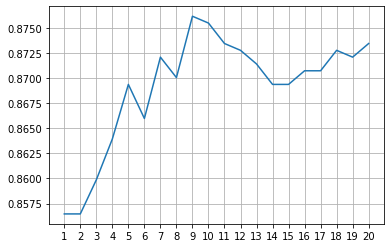

In [11]:
plt.plot(data.k, data.accuracy)
plt.xticks(range(1,21))
plt.grid(True)

## 3. 수업시간때 배웠던 코미디/액션 분류 예제 데이터에서
## 재미있는 맹렬한 빠른 단어가 나올경우
## model.predict_proba()함수를 통해
## 액션은 0.71536991 / 코미디는 0.28463009입니다
## model.predict_proba()함수를 사용하지 않고 배웠던 다른 함수들을 통해 predict_proba()함수의 결과값을 계산해주세요!

## * Naive Bayes모델은 Laplace 1을 적용해주세요!
## * 계산이 헷갈리시는분들은 https://gomguard.tistory.com/69 를 참고해주세요

In [12]:
col = ['장르', '재미있는', '연인', '사랑', '맹렬한', '빠른', '총격', '날으는']

genre = ['코미디', '액션', '코미디', '액션', '액션']
V1 = [1, 0, 2, 1, 0]
V2 = [1, 0, 1, 0, 0]
V3 = [2, 0, 0, 0, 1]
V4 = [0, 1, 0, 1, 0]
V5 = [0, 1, 1, 0, 1]
V6 = [0, 1, 0, 2, 1]
V7 = [0, 0, 1, 0, 1]

dic = {'장르':genre, 'V1':V1, 'V2':V2, 'V3':V3, 'V4':V4, 'V5':V5, 'V6':V6, 'V7':V7}

In [13]:
data = pd.DataFrame(dic)
data.columns = col

def convert(x) :
    if x > 0 :
        return 1
    else :
        return 0

data['재미있는'].apply(convert)
data.columns[1:]
for i in data.columns[1:]:
    data[i] = data[i].apply(convert)
    
data

,장르,재미있는,연인,사랑,맹렬한,빠른,총격,날으는
0,코미디,1,1,1,0,0,0,0
1,액션,0,0,0,1,1,1,0
2,코미디,1,1,0,0,1,0,1
3,액션,1,0,0,1,0,1,0
4,액션,0,0,1,0,1,1,1


In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1)
model.fit(data.iloc[:, 1:], data['장르'])
test = np.array([1, 0, 0, 1, 1, 0, 0]).reshape(1, -1) 
model.predict(test)
model.predict_proba(test)

array([[0.71536991, 0.28463009]])

## 직접 계산해서 해보기
#### P(액션/재미 ^ 맹렬 ^ 빠른) =  P(재미있는/액션) * P(맹렬한/액션)*P(빠른/액션)*P(액션) 을 구해야하는데, 이 때 여러번 곱해지면 underflow 생길 수 있으니 log 를 써서 다 더해준 후 나중에 exponential 을 취해준다.


In [15]:
# class_log_prior_ : class별 log를 씌운 사전확률
log_class = model.class_log_prior_
log_class

array([-0.51082562, -0.91629073])

In [16]:
# feature_log_prob_ : 단어별 log를 씌운 사후확률
log_words = model.feature_log_prob_
log_words

array([[-2.14006616, -2.83321334, -2.14006616, -1.73460106, -1.73460106,
        -1.44691898, -2.14006616],
       [-1.54044504, -1.54044504, -1.94591015, -2.63905733, -1.94591015,
        -2.63905733, -1.94591015]])

In [17]:
log_action = log_words[0][0] + log_words[0][3] + log_words[0][4] + log_class[0]
log_action

-6.120093898038474

In [18]:
log_comedy = log_words[1][0] + log_words[1][3] + log_words[1][4] + log_class[1]
log_comedy

-7.041703251491875

In [19]:
np.exp(log_action)

0.0021982495420313467

In [20]:
np.exp(log_comedy)

0.00087463556851312

In [21]:
## 정규화 상수로 나눠주기

log_sum = np.exp(log_action) + np.exp(log_comedy)
log_sum

print(np.exp(log_action) / log_sum)
print(np.exp(log_comedy) / log_sum)

0.7153699090435085
0.2846300909564915



** 추가 질문)

원래 공식에서는 p(a/b) = p(b/a)p(a) / p(b) 인데,

여기서 p(b)는 항상 생략하던데, p(b)가 재미있는,빠른,맹렬한이 동시에 나올 확률인데 이걸 어떻게 구하나요? 1이라고 생각하는건가요?

## 정답

In [22]:
col = ['장르', '재미있는', '연인', '사랑', '맹렬한', '빠른', '총격', '날으는']

genre = ['코미디', '액션', '코미디', '액션', '액션']
V1 = [1, 0, 2, 1, 0]
V2 = [1, 0, 1, 0, 0]
V3 = [2, 0, 0, 0, 1]
V4 = [0, 1, 0, 1, 0]
V5 = [0, 1, 1, 0, 1]
V6 = [0, 1, 0, 2, 1]
V7 = [0, 0, 1, 0, 1]

dic = {'장르':genre, 'V1':V1, 'V2':V2, 'V3':V3, 'V4':V4, 'V5':V5, 'V6':V6, 'V7':V7}


data = pd.DataFrame(dic)
data.columns = col


def convert(x):
    if x > 0:
        return 1
    else:
        return 0


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1)
model.fit(data.iloc[:, 1:], data['장르'])